# Experimental Design
***
## Simulation

Import the necessary packages and code for simulating an experiment.

In [1]:
%matplotlib inline

import numpy as np
import os, sys

from hogben.simulate import SimulateReflectivity

# Reduce size of plots for the notebook.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.dpi'] = 100

Next, define the structure that we want to simulate. Here the structure has been defined using [refnx](https://refnx.readthedocs.io/).

In [2]:
from refnx.reflect import SLD, ReflectModel

# Defines a structure describing a simple sample.
air = SLD(0, name='Air')
layer1 = SLD(4, name='Layer 1')(thick=100, rough=2)
layer2 = SLD(8, name='Layer 2')(thick=150, rough=2)
substrate = SLD(2.047, name='Substrate')(thick=0, rough=2)

sample_1 = air | layer1 | layer2 | substrate


# Convert the structure into a refnx model and add instrumental factors
model_1 = ReflectModel(sample_1)

model_1.scale = 1
model_1.bkg = 1e-6
model_1.dq = 2

Here we see what the SLD profile of our simple structure looks like.

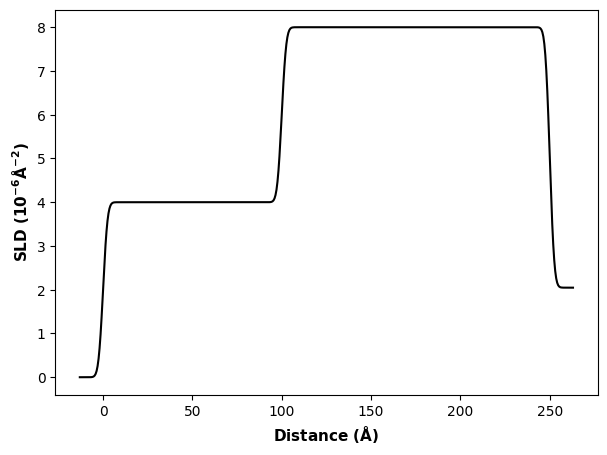

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(*sample_1.sld_profile(), color='black')
ax.set_xlabel('$\mathregular{Distance\ (\AA)}$', fontsize=11, weight='bold')
ax.set_ylabel('$\mathregular{SLD\ (10^{-6} \AA^{-2})}$', fontsize=11, weight='bold')
plt.show()

To simulate the structure, we need to define the counting times and number of points for each angle to simulate. We also specify the experimental scale factor, level of background noise and instrument resolution (in this case constant 2% $dQ/Q$).

In [4]:
angle_times = [(0.7, 100, 5),
               (2.0, 100, 20)] # (Angle, Points, Time)

instrument = 'OFFSPEC' # Options are 'INTER', 'OFFSPEC', 'POLREF' or 'SURF'


# Simulate the experiment.
data_1 = SimulateReflectivity(model_1, angle_times, instrument).simulate()

We can now plot the simulated data together with the "true" model reflectivity. Note that this data is not stitched; the data from each individual angle has been plotted without any rebinning.

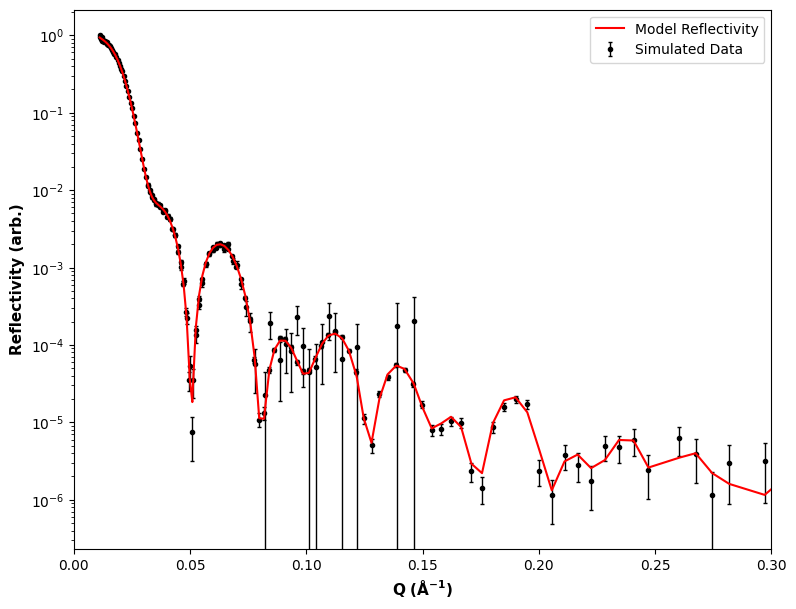

In [7]:
def plot_reflectivity(model, data):
    # Extract each column of the simulated `data`.
    q, r, dr, counts = data[0], data[1],  data[2], data[3]

    # Calculate the model reflectivity.
    r_model = SimulateReflectivity(model, angle_times, instrument).reflectivity(q)

    # Plot the model and simulated reflectivity against Q.
    fig = plt.figure(figsize=[9,7])
    ax = fig.add_subplot(111)

    # Model reflectivity.
    ax.plot(q, r_model, color='red', zorder=20, label='Model Reflectivity')

    # Simulated reflectivity
    ax.errorbar(q, r, dr, color='black', marker='o', ms=3, lw=0, elinewidth=1, capsize=1.5, label='Simulated Data')

    ax.set_xlabel('$\mathregular{Q\ (Å^{-1})}$', fontsize=11, weight='bold')
    ax.set_ylabel('Reflectivity (arb.)', fontsize=11, weight='bold')
    ax.set_yscale('log')
    ax.set_xlim(0, 0.3)
    ax.legend()
    plt.show()
    
plot_reflectivity(model_1, data_1)